In [10]:
import json
import os
from os import listdir
from os.path import isfile, join
import pickle
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

import tabulate
import numpy as np
import math

from itertools import cycle, islice


In [11]:

fig_width = 8
fig_height = 5

params = {
    'axes.labelsize': 16, # fontsize for x and y labels (was 10)
    'axes.titlesize': 16,
    'legend.fontsize': 16, # was 10
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
#    'text.usetex': True,
    'figure.figsize': [fig_width,fig_height],
    'font.family': 'serif',
    'grid.linestyle': '--',
    'lines.linewidth': 2
}

matplotlib.rcParams.update(params)

In [15]:
data_dir = 'parallel_data'
out_dir = 'parallel_plots'


appname = 'LUBM'
data_size_dir = 'LUBM'
collections = ['schemex', 'attribute', 'type']
suffix = ''
hide_legend = False

appname = 'BSBM'
data_size_dir = 'BSBM'
collections = ['attribute', 'type', 'schemex'] #, 
parallizations = ['parallel_1', 'parallel_2', 'parallel_4', 'parallel_8', 'parallel_16']
#parallizations = ['parallel_16', 'parallel_8', 'parallel_4', 'parallel_2', 'parallel_1']

suffix = '-test-2'
hide_legend = False
# BSBM_attribute-parallel_1-test-1-performance.csv'

# BSBM-attribute-parallel_1-test-1-performance.csv

#appname = 'dyldo_y2019_core'
#data_size_dir = 'DyLDO-core'
#collections =['schemex', 'attribute', 'type']
#suffix = ''
#hide_legend = True


#appname = 'dyldo_y2019_full'
#data_size_dir = 'DyLDO-ext'
#collections =['schemex', 'attribute', 'type']
#suffix = ''
#hide_legend = True


ticks = 5.0
interpolate = True

,attribute-parallel_1-Inc,attribute-parallel_1-Batch,attribute-parallel_2-Inc,attribute-parallel_2-Batch,attribute-parallel_4-Inc,attribute-parallel_4-Batch,attribute-parallel_8-Inc,attribute-parallel_8-Batch,attribute-parallel_16-Inc,attribute-parallel_16-Batch,...,schemex-parallel_1-Inc,schemex-parallel_1-Batch,schemex-parallel_2-Inc,schemex-parallel_2-Batch,schemex-parallel_4-Inc,schemex-parallel_4-Batch,schemex-parallel_8-Inc,schemex-parallel_8-Batch,schemex-parallel_16-Inc,schemex-parallel_16-Batch
Iteration,,,,,,,,,,,,,,,,,,,,,
0,0.281567,0.263617,0.194950,0.178583,0.144983,0.132983,0.156217,0.141850,0.160983,0.140733,...,0.312150,0.277333,0.210533,0.190150,0.164967,0.141167,0.171183,0.147617,0.175150,0.144583
1,2.163467,2.123083,1.495867,1.383600,1.002933,1.023600,0.992900,1.018700,1.073200,1.053433,...,3.141150,2.775567,2.126717,1.957767,1.650733,1.565733,1.664633,1.620983,1.682117,1.511933
2,4.047183,4.187600,3.042100,2.984567,1.942733,1.952867,2.046217,2.106333,2.072517,2.127667,...,6.800850,5.427267,5.079767,3.982233,4.100217,3.045467,4.194950,3.118817,4.448700,3.229833
3,5.949267,6.285833,3.822550,4.220867,2.913833,2.981183,3.079733,2.973433,3.121483,3.108717,...,13.556200,10.056533,11.168050,7.880033,9.574250,6.522300,9.558700,7.172033,9.639433,6.782400
4,8.148167,8.037733,5.068683,5.469083,3.726183,3.856667,3.843183,4.055783,3.797617,4.044017,...,8.813967,12.658800,5.964033,9.562500,4.334767,8.260000,4.483467,7.796433,4.606617,8.281217


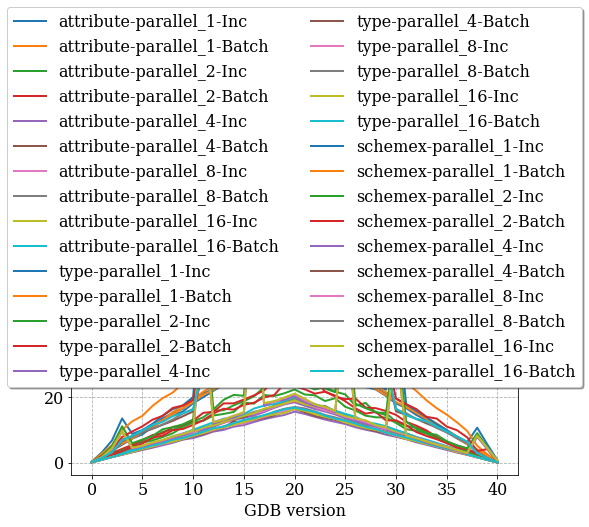

In [16]:
iterations = 0



performance_frame = pd.DataFrame() 
for collection in collections:
#    new_zero_incr = 0
#    new_zero_batch = 0
    for parallelization in parallizations:
        with open(os.path.join(data_dir, appname + '-'+collection+'-'+parallelization+suffix+'-performance.csv'), 'r') as f:
            df = pd.read_csv(f, sep=',')
            iterations = max(iterations, len(df['Iteration']))
            df = df.set_index('Iteration')
#            if parallelization == 'parallel_1':
#                new_zero_incr = df['Incremental Duration']
#                new_zero_batch = df['Batch Duration']
#                performance_frame[collection+'-'+parallelization+'-Inc'] = 0
#                performance_frame[collection+'-'+parallelization+'-Batch'] = 0

              
            performance_frame[collection+'-'+parallelization+'-Inc'] = df['Incremental Duration']
            performance_frame[collection+'-'+parallelization+'-Batch'] = df['Batch Duration']

                
    
    

#performance_frame.columns = ['SchemEX:Incr', 'SchemEX:Batch', 
#             'AttrColl:Incr', 'AttrColl:Batch',
#             'TypeColl:Incr', 'TypeColl:Batch']
 
convert = lambda x: x / 1000 / 60
performance_frame = performance_frame.applymap(convert)  
display(performance_frame.head())

if appname == 'dyldo_y2019_core':
    if interpolate:
        performance_frame = performance_frame.drop(performance_frame.index[[21,22]])
    else:
        performance_frame.loc[21:22,'SchemEX:Incr':'TypeColl:Batch']=np.nan,np.nan,np.nan,np.nan,np.nan,np.nan
    display(performance_frame)
    
if appname == 'dyldo_y2019_full':
    performance_frame = performance_frame.head()
    iterations = 5
    ticks = 1.0
    print('drop the beat')
    
# style = ['--','-','--','-','--','-'], color=['darkslateblue', 'darkslateblue',
#                    'forestgreen', 'forestgreen', 'indianred', 'indianred']    
ax = performance_frame.plot(logy=False)
ax.set_xlabel("GDB version")
ax.set_ylabel("Minutes")
#ax.yaxis.set_label_coords(-0.075,.9)
plt.xticks(np.arange(0, iterations, ticks))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.75), shadow=True, ncol=2)

if hide_legend:
    ax.get_legend().remove()

plt.grid(True)
plt.savefig(out_dir + '/' + appname + '-performance.pdf', bbox_inches = 'tight')
    


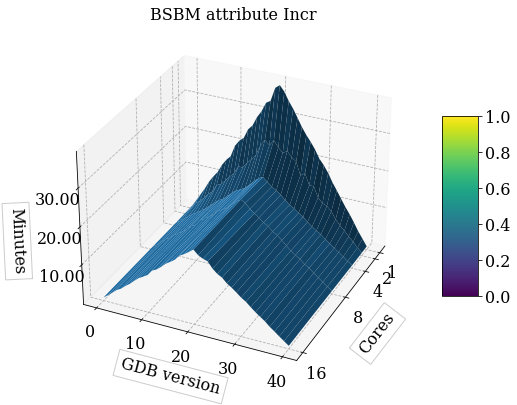

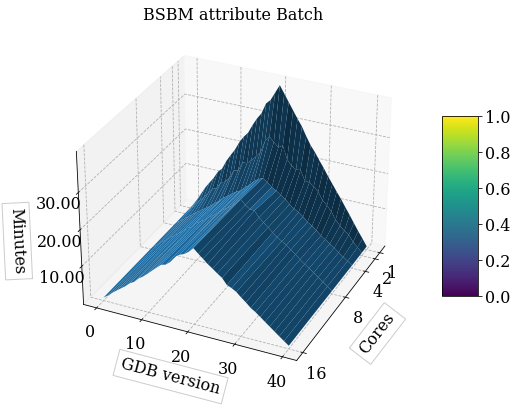

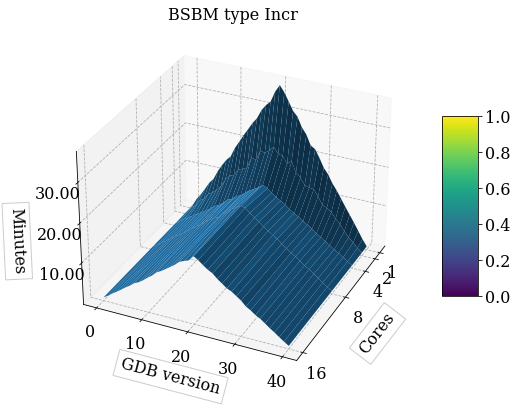

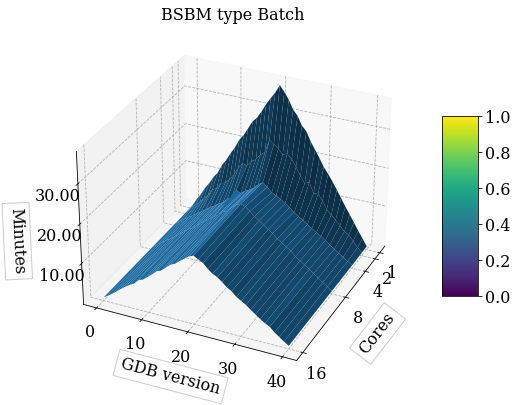

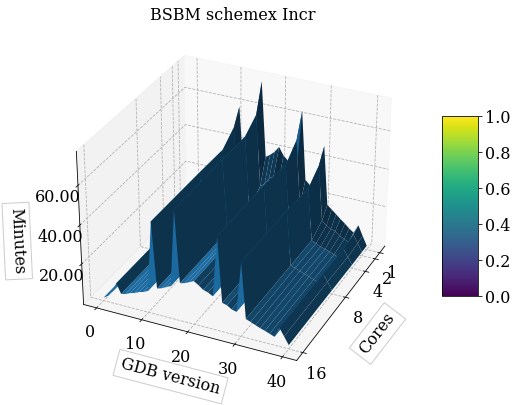

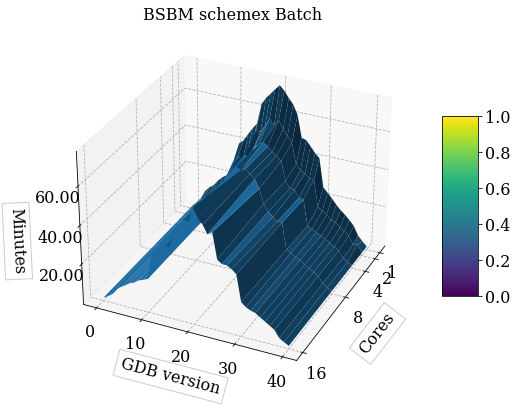

In [22]:
#display(performance_frame)
box = dict(facecolor='white', pad=5, alpha=0.2)


for collection in collections:
    values_incr = []
    values_batch = []
    for parallelization in parallizations:
        values_incr.append(np.array(performance_frame[collection+'-'+parallelization+'-Inc']))
        values_batch.append(np.array(performance_frame[collection+'-'+parallelization+'-Batch']))
        
    ## TODO parameterize
    X = [1,2,4,8,16]
    Y = np.arange(0, 41, 1)
    X, Y = np.meshgrid(X, Y)
    Z = np.transpose(np.array(values_incr))


    
    fig = plt.figure()
    ax = Axes3D(fig)
    
    #     surf = ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)
        
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, #cmap=cm.coolwarm,
                           linewidth=0, antialiased=True)
    #ax.set_zlim(-1.01, 1.01)
    #ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title(appname + ' '+collection + ' Incr')
    plt.xticks([1,2,4,8,16])
    #plt.yticks(np.arange(0, iterations, ticks))
    ax.view_init(30, 25)
    
    ax.set_xlabel("Cores", labelpad=10, bbox=box)
    ax.set_ylabel("GDB version", labelpad=10, bbox=box)
    ax.set_zlabel("Minutes", labelpad=15, bbox=box)

    plt.savefig(out_dir + '/' + appname + '-'+collection + '-Incr' + '-parallel.pdf',  bbox_inches = 'tight')
    plt.show()
    ### batch
    Z = np.transpose(np.array(values_batch))

    fig = plt.figure()
    ax = Axes3D(fig)
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                           linewidth=0, antialiased=True)
    #ax.set_zlim(-1.01, 1.01)cmap=cm.coolwarm,
    #ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title(appname + ' '+collection + ' Batch')
    plt.xticks([1,2,4,8,16])
    #plt.yticks(np.arange(0, iterations, ticks))
    
    ax.view_init(30, 25)
    
    ax.set_xlabel("Cores", labelpad=10, bbox=box)
    ax.set_ylabel("GDB version", labelpad=10, bbox=box)
    ax.set_zlabel("Minutes", labelpad=15, bbox=box)

    plt.savefig(out_dir + '/' + appname + '-'+collection + '-Batch' + '-parallel.pdf',  bbox_inches = 'tight')
    plt.show()
#     for angle in range(0, 360):
#         ax.view_init(30, angle)
#         plt.draw()
#         plt.pause(.001)


In [7]:
import numpy as np
import matplotlib.pyplot as plt




In [161]:
size_frame = pd.DataFrame()
for collection in collections:
    with open(os.path.join(data_dir, appname + '_'+collection+suffix+'-update-time-and-space.csv'), 'r') as f:
        df = pd.read_csv(f, sep=',')
        df.head()
        
        iterations = max(iterations, len(df['Iteration']))
        df = df.set_index('Iteration')

        if '|V|' not in size_frame:
            size_frame['|V|'] = df['Imprint links']
            
        size_frame[collection+':|V_vs|'] = df['Schema Elements (SE)']
        size_frame[collection+':|E_vs|'] = df['Schema Relations (SR)']


        
size_frame = size_frame.join(edgeframe,how='left')
display(size_frame.head())


,|V|,schemex:|V_vs|,schemex:|E_vs|,attribute:|V_vs|,attribute:|E_vs|,type:|V_vs|,type:|E_vs|,0
Iteration,,,,,,,,
0,7271943,243423,1303004,50208.0,706205.0,42300.0,0.0,82221979
1,7509702,249691,1413856,54281.0,781832.0,39785.0,0.0,82245640
2,7064987,240266,1333850,52570.0,744073.0,39088.0,0.0,82381421
3,10592783,232566,1405716,56388.0,790516.0,31781.0,0.0,106491385
4,10440827,225972,1370282,55389.0,785474.0,31194.0,0.0,105755426


In [162]:
display(size_frame['|V|'].min())
display(size_frame['|V|'].max())
display(size_frame['|V|'].mean())
display(size_frame['|V|'].std())

6382958

10718848

9097698.909090908

1663543.6874221521

drop the beat


,|V|,SchemEX:|V_vs|,SchemEX:|E_vs|,AttrColl:|V_vs|,AttrColl:|E_vs|,TypeColl:|V_vs|,TypeColl:|E_vs|,|E|
Iteration,,,,,,,,
0,7271943,243423,1303004,50208.0,706205.0,42300.0,0.0,82221979
1,7509702,249691,1413856,54281.0,781832.0,39785.0,0.0,82245640
2,7064987,240266,1333850,52570.0,744073.0,39088.0,0.0,82381421
3,10592783,232566,1405716,56388.0,790516.0,31781.0,0.0,106491385
4,10440827,225972,1370282,55389.0,785474.0,31194.0,0.0,105755426


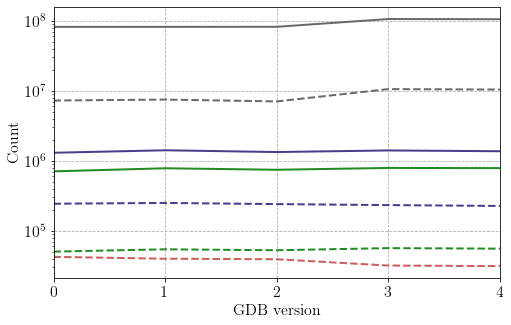

In [163]:
size_frame.columns = ['|V|', 'SchemEX:|V_vs|','SchemEX:|E_vs|' 
                    , 'AttrColl:|V_vs|', 'AttrColl:|E_vs|'
                    , 'TypeColl:|V_vs|', 'TypeColl:|E_vs|', '|E|']

if appname == 'dyldo_y2019_core':
    if interpolate:
        size_frame = size_frame.drop(size_frame.index[[21,22]])
    else:
        size_frame.loc[21:22,'|V|':'|E|']=np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan
   

if appname == 'dyldo_y2019_full':
    size_frame = size_frame.head()
    iterations = 5
    ticks = 1.0
    print('drop the beat')
    
  
display(size_frame)

sorted_frame = size_frame[['SchemEX:|V_vs|', 'SchemEX:|E_vs|' 
                    , 'AttrColl:|V_vs|', 'AttrColl:|E_vs|'
                    , 'TypeColl:|V_vs|', 'TypeColl:|E_vs|', '|V|', '|E|']]

sorted_frame.columns=['SchemEX:$|V_{vs}|$', 'SchemEX:$|E_{vs}|$' 
                    , 'AttrColl:$|V_{vs}|$', 'AttrColl:$|E_{vs}|$'
                    , 'TypeColl:$|V_{vs}|$', 'TypeColl:$|E_{vs}|$', '$|V|$', '$|E|$']

ax = sorted_frame.plot(logy=True, style = ['--','-','--','-','--','-','--','-'], 
                       color=['darkslateblue', 'darkslateblue',
                             'forestgreen','forestgreen',
                             'indianred','indianred', 'dimgray', 'dimgray'])#,yticks=([math.exp(w) for w in np.arange(1, 10, 2)]))
#ax.set_ylim([2500, 80000])color=['dimgray', 'darkslateblue']
#plt.yticks(np.arange(0, iterations, 5.0))
#plt.
plt.xticks(np.arange(0, iterations, ticks))
ax.set_xlabel("GDB version")
ax.set_ylabel("Count")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.325), shadow=True, ncol=3)
if hide_legend:
    ax.get_legend().remove()
    
plt.grid(True)
plt.savefig(out_dir + '/' + appname + '-sizes.pdf',  bbox_inches = 'tight')

Index(['NewlyObservedSchema (SE_new)', 'DeletedSchemaStructures (SE_del)',
       'ChangedSchemaStructures (SE_mod)', 'InstanceNotChanged (PE_mod)'],
      dtype='object')
Index(['NewlyObservedSchema (SE_new)', 'DeletedSchemaStructures (SE_del)',
       'ChangedSchemaStructures (SE_mod)', 'InstanceNotChanged (PE_mod)'],
      dtype='object')
Index(['NewlyObservedSchema (SE_new)', 'DeletedSchemaStructures (SE_del)',
       'ChangedSchemaStructures (SE_mod)', 'InstanceNotChanged (PE_mod)'],
      dtype='object')


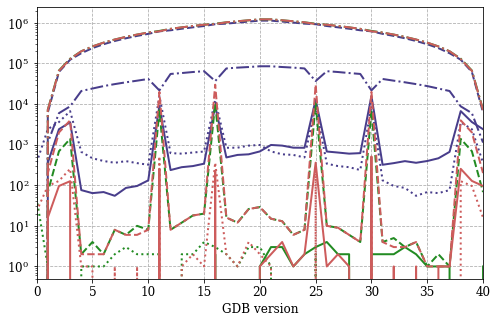

In [9]:
frames = [None, None, None]
i = 0
iterations = 0
for collection in collections:
    with open(os.path.join(data_dir, appname + '_'+collection+suffix+'-changes.csv'), 'r') as f:
        df = pd.read_csv(f, sep=',')
        df.head()

        #del df['NewlyObservedSchema (SE_new)']
        #del df['DeletedSchemaStructures (SE_del)']

        
        del df['TotalNumberOfNewInstances'] 
        del df['InstanceAddedWithKnownSchema (PE_add)']
        del df['InstancesDeleted (PE_del)']
        del df['ChangedSchemaStructuresBecauseOfNeighbor'] 
        del df['PayloadEntriesAdded'] 
        del df['PayloadEntriesRemoved'] 
        del df['InstanceToSchemaLinksAdded'] 
        del df['InstanceToSchemaLinksRemoved'] 

        del df['TotalNumberOfChangedPayloadElements (real PE_mod)']
        
        del df['TotalNumberOfSchemaElementsWritten']
        del df['TotalNumberOfSchemaElementsDeleted']
        #del df['InstanceNotChanged (PE_mod)']
        iterations = max(iterations, len(df['Iteration']))
        df = df.set_index('Iteration')
        print(df.columns)
        df.columns = [collection+'ADD', collection+'DEL', collection+'MOD', collection+'unchanged']    #'Modified pe(v)'
        
        #df.columns = [collection+'MOD-ELEM', collection+'Unchanged v', collection+'ADD-ELEM', collection+'DEL-ELEM']    #'Modified pe(v)'
        #df = df[[collection+'ADD-ELEM', collection+'DEL-ELEM', collection+'MOD-ELEM',collection+'Unchanged v']] #'Modified pe(v)'
        frames[i] = df
        i = i + 1
        
df = pd.concat(frames, sort=False)


df.columns = ['SchemEX:ADD', 'SchemEX:DEL', 'SchemEX:MOD','SchemEX:PAY',
             'AttrColl:ADD', 'AttrColl:DEL', 'AttrColl:MOD','AttrColl:PAY',
             'TypeColl:ADD', 'TypeColl:DEL', 'TypeColl:MOD','TypeColl:PAY']
ax = df.plot(logy=True, style = [':','-','--','-.',':','-','--','-.',':','-','--','-.'], 
             color=['darkslateblue', 'darkslateblue', 'darkslateblue', 'darkslateblue', 
                    'forestgreen', 'forestgreen', 'forestgreen','forestgreen',
                   'indianred', 'indianred', 'indianred','indianred'])
#ax.set_ylabel("Quantity")
#ax.yaxis.set_label_coords(-0.015,1.0)
plt.xticks(np.arange(0, iterations, 5.0))
ax.set_xlabel("GDB version")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.325), shadow=True, ncol=3)

if hide_legend:
    ax.get_legend().remove()

plt.grid(True)
plt.savefig(out_dir + '/' + appname + '-changes.png', bbox_inches = 'tight')